# EDA

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
movies = pd.read_csv('./data/wiki_movie_plots_deduped.csv')

In [4]:
movies.head()

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr..."
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov..."
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed..."
3,1901,"Terrible Teddy, the Grizzly King",American,Unknown,NaN,unknown,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...
4,1902,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",NaN,unknown,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...


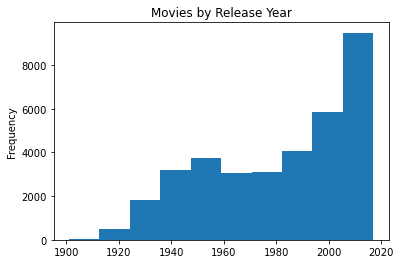

In [8]:
movies['Release Year'].plot(kind='hist', title='Movies by Release Year');

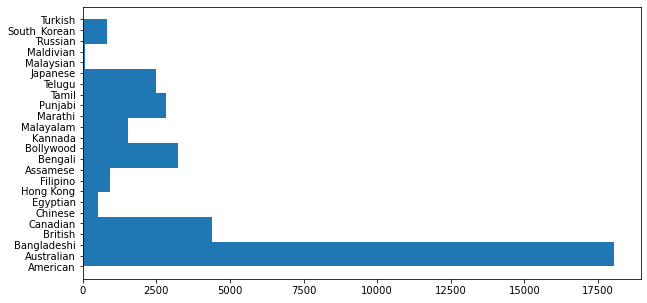

In [25]:
plt.figure(figsize = (10, 5))
plt.hist(movies['Origin/Ethnicity'], orientation='horizontal');

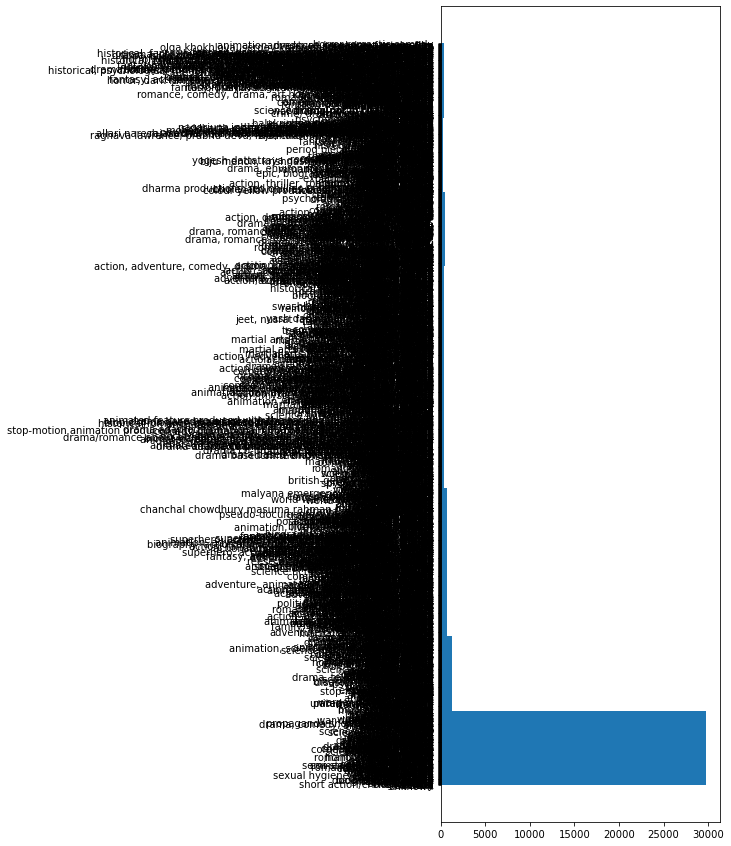

In [26]:
plt.figure(figsize = (5, 15))
plt.hist(movies['Genre'], orientation='horizontal');

In [44]:
movies['Genre'].value_counts()

unknown                       6083
drama                         5964
comedy                        4379
horror                        1167
action                        1098
                              ... 
afghan war drama                 1
social satire drama              1
comedy/romance/fantasy           1
animated, family, spy film       1
fantasy horror                   1
Name: Genre, Length: 2265, dtype: int64

## Get first 25 genres, excluding "unknown"

In [50]:
genres = [movies['Genre'].value_counts().keys()[i] for i in range (1, 26)]

In [51]:
genres

['drama',
 'comedy',
 'horror',
 'action',
 'thriller',
 'romance',
 'western',
 'crime',
 'adventure',
 'musical',
 'crime drama',
 'romantic comedy',
 'science fiction',
 'film noir',
 'mystery',
 'war',
 'animation',
 'comedy, drama',
 'sci-fi',
 'family',
 'fantasy',
 'animated',
 'musical comedy',
 'comedy-drama',
 'biography']

In [52]:
type(genres)

list

In [58]:
movies['Genre'].isin(genres)

0        False
1        False
2        False
3        False
4        False
         ...  
34881    False
34882     True
34883     True
34884     True
34885    False
Name: Genre, Length: 34886, dtype: bool

In [62]:
movies_genres = movies[movies['Genre'].isin(genres)].copy(deep=True)

In [63]:
movies_genres.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20958 entries, 6 to 34884
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Release Year      20958 non-null  int64 
 1   Title             20958 non-null  object
 2   Origin/Ethnicity  20958 non-null  object
 3   Director          20958 non-null  object
 4   Cast              20574 non-null  object
 5   Genre             20958 non-null  object
 6   Wiki Page         20958 non-null  object
 7   Plot              20958 non-null  object
dtypes: int64(1), object(7)
memory usage: 1.4+ MB


In [64]:
#gonna drop Cast because it has some missing values and I'm not using that column anyway. Also dropping Wiki Page
movies_genres.drop(columns=['Cast', 'Wiki Page'], inplace=True)

In [66]:
movies_genres.head(1)

,Release Year,Title,Origin/Ethnicity,Director,Genre,Plot
6,1903,The Great Train Robbery,American,Edwin S. Porter,western,The film opens with two bandits breaking into ...


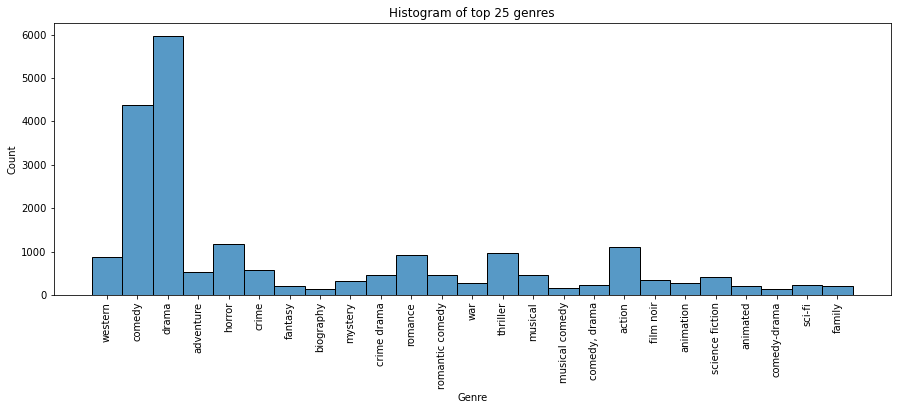

In [75]:
plt.figure(figsize = (15, 5))
sns.histplot(movies_genres['Genre'])
plt.title('Histogram of top 25 genres')
plt.xticks(rotation=90);

In [68]:
movies_genres['Genre'].value_counts()

drama              5964
comedy             4379
horror             1167
action             1098
thriller            966
romance             923
western             865
crime               568
adventure           526
musical             467
crime drama         464
romantic comedy     461
science fiction     418
film noir           345
mystery             310
war                 273
animation           264
comedy, drama       236
sci-fi              221
family              217
fantasy             204
animated            195
musical comedy      154
comedy-drama        137
biography           136
Name: Genre, dtype: int64

In [103]:
plot_length = []
for index, row in movies_genres.iterrows():
    plot_length.append(len(row['Plot'].split()))

In [106]:
plot_length[0:5]

[239, 34, 103, 48, 143]

In [107]:
movies_genres['plot_length'] = plot_length

In [108]:
movies_genres['plot_length']

6         239
7          34
14        103
15         48
16        143
         ... 
34875     859
34876    1034
34882      11
34883      67
34884     193
Name: plot_length, Length: 20958, dtype: int64

In [110]:
movies_genres.tail()

,Release Year,Title,Origin/Ethnicity,Director,Genre,Plot,plot_length
34875,2011,Once Upon a Time in Anatolia,Turkish,Nuri Bilge Ceylan,drama,"Through the night, three cars carry a small gr...",859
34876,2013,Selam,Turkish,Levent Demirkale,drama,The film opens with a Senegalese boy named Kha...,1034
34882,2017,Çalgı Çengi İkimiz,Turkish,Selçuk Aydemir,comedy,"Two musicians, Salih and Gürkan, described the...",11
34883,2017,Olanlar Oldu,Turkish,Hakan Algül,comedy,"Zafer, a sailor living with his mother Döndü i...",67
34884,2017,Non-Transferable,Turkish,Brendan Bradley,romantic comedy,The film centres around a young woman named Am...,193


In [114]:
movies_genres['plot_length'].mean()

372.0960492413398

In [121]:
genre_plot_len = {}
for genre in genres:
    genre_plot_len[genre] = movies_genres[movies_genres['Genre'] == genre]['plot_length'].mean()

In [122]:
genre_plot_len

{'drama': 328.24966465459426,
 'comedy': 352.671386161224,
 'horror': 534.0325621251071,
 'action': 409.275956284153,
 'thriller': 431.2712215320911,
 'romance': 313.2296858071506,
 'western': 291.6092485549133,
 'crime': 255.34330985915494,
 'adventure': 358.9220532319392,
 'musical': 314.0556745182013,
 'crime drama': 434.2133620689655,
 'romantic comedy': 401.4815618221258,
 'science fiction': 575.2464114832536,
 'film noir': 340.0695652173913,
 'mystery': 289.6290322580645,
 'war': 445.0879120879121,
 'animation': 534.8560606060606,
 'comedy, drama': 349.3474576271187,
 'sci-fi': 472.26244343891403,
 'family': 488.1152073732719,
 'fantasy': 577.1519607843137,
 'animated': 549.1538461538462,
 'musical comedy': 322.5584415584416,
 'comedy-drama': 465.6788321167883,
 'biography': 422.36764705882354}

Text(0.5, 1.0, 'Average length of plot description per genre')

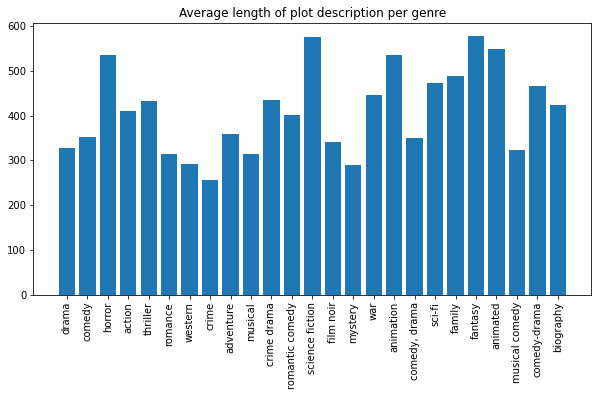

In [131]:
plt.figure(figsize=(10, 5))
plt.bar(genre_plot_len.keys(), genre_plot_len.values())
plt.xticks(rotation = 90)
plt.title('Average length of plot description per genre')

In [132]:
movies_genres.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20958 entries, 6 to 34884
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Release Year      20958 non-null  int64 
 1   Title             20958 non-null  object
 2   Origin/Ethnicity  20958 non-null  object
 3   Director          20958 non-null  object
 4   Genre             20958 non-null  object
 5   Plot              20958 non-null  object
 6   plot_length       20958 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 1.8+ MB


In [134]:
movies_genres.to_csv('./data/movies_cleaned.csv', index = False)